# IMPORTS

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
from skimage.filters import threshold_otsu

# FUNCTIONS

In [2]:
def get_imgs(path, subsample):
    imgs = []
    for i in range(1, len(os.listdir()) + 2):
        imgs.append(cv2.imread(path+"img"+str(i)+".jpg"))
    imgs = np.array(imgs)
    imgs = imgs[:,::subsample,::subsample]
    return imgs

def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

def seg_kmeans(imgs, K, attempts):
    res_imgs = []
    for img in imgs:
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        twoDimage = img.reshape((-1,3))
        twoDimage = np.float32(twoDimage)
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
        ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
        center = np.uint8(center)
        res = center[label.flatten()]
        result_img = res.reshape((img.shape))
        result_img = result_img.mean(axis=2)
        res_imgs.append(result_img)
    return np.array(res_imgs)

def seg_edge(imgs):
    res_imgs = []
    for img in imgs:
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        _, thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)
        edges = cv2.dilate(cv2.Canny(thresh,0,255),None)
        res_imgs.append(edges)
    return np.array(res_imgs)

def seg_otsu(imgs):
    res_imgs = []
    for img in imgs:
        img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
        thresh = threshold_otsu(img_gray)
        img_otsu  = img_gray < thresh
        filtered = filter_image(img, img_otsu)
        res_imgs.append(filtered)
    return np.array(res_imgs)

def seg_color(imgs, color):
    res_imgs = []
    for img in imgs:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)
        if color=="blue":
            light_blue = (90, 70, 50)
            dark_blue = (128, 255, 255)
            mask = cv2.inRange(hsv_img, light_blue, dark_blue)
        elif color=="green":
            light_green = (40, 40, 40)
            dark_greek = (70, 255, 255)
            mask = cv2.inRange(hsv_img, light_green, dark_greek)
        result = cv2.bitwise_and(img, img, mask=mask)
        res_imgs.append(result)
    return np.array(res_imgs)
        
def show_imgs(imgs, res_imgs):
    for i in range(len(res_imgs)):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))
        fig.suptitle('IMG VS SEGMENTED IMG')
        ax1.imshow(imgs[i])
        ax2.imshow(res_imgs[i])

In [3]:
path = './img/'

# K-MEANS SEGMENTATION

---------------------------------------- K= 2 ----------------------------------------


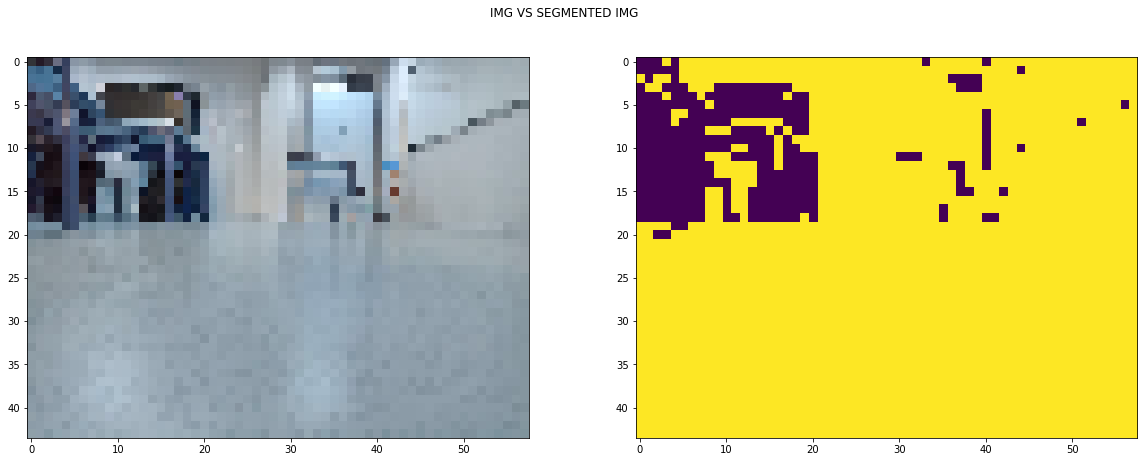

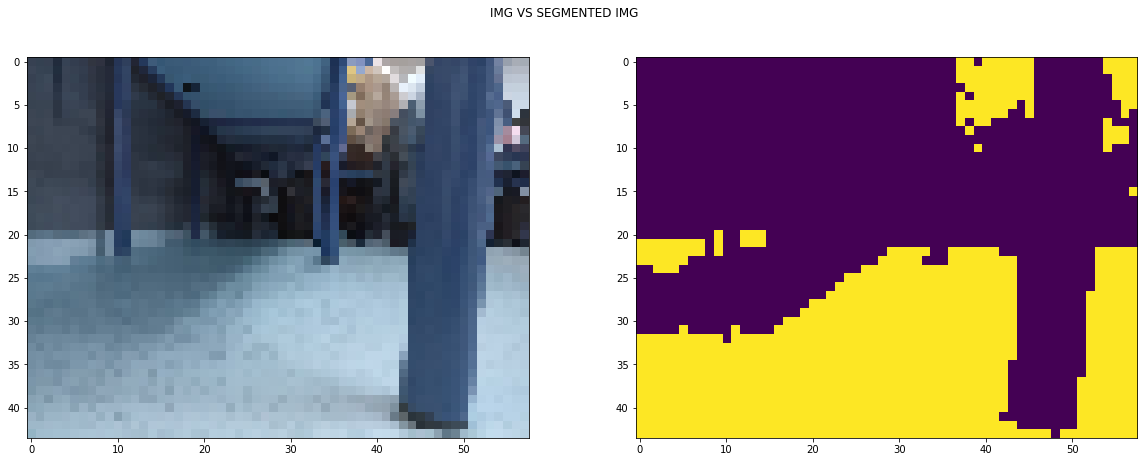

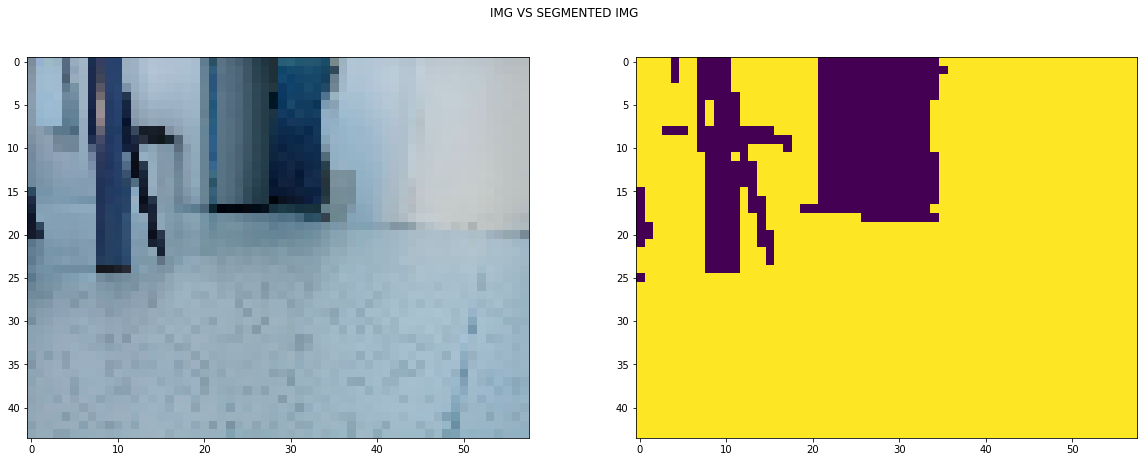

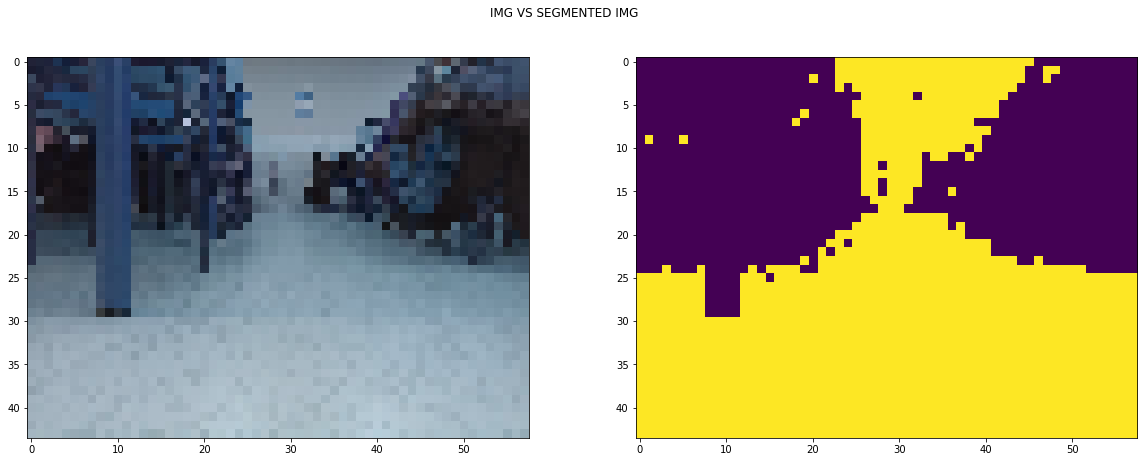

In [4]:
subsample = 20
imgs = get_imgs(path, subsample)
attempts = 10
K_s = np.arange(2,3)

for K in K_s:
    print("---------------------------------------- K=",K,"----------------------------------------")
    res_imgs = seg_kmeans(imgs, K, attempts)
    show_imgs(imgs, res_imgs)

# EDGE SEGMENTATION

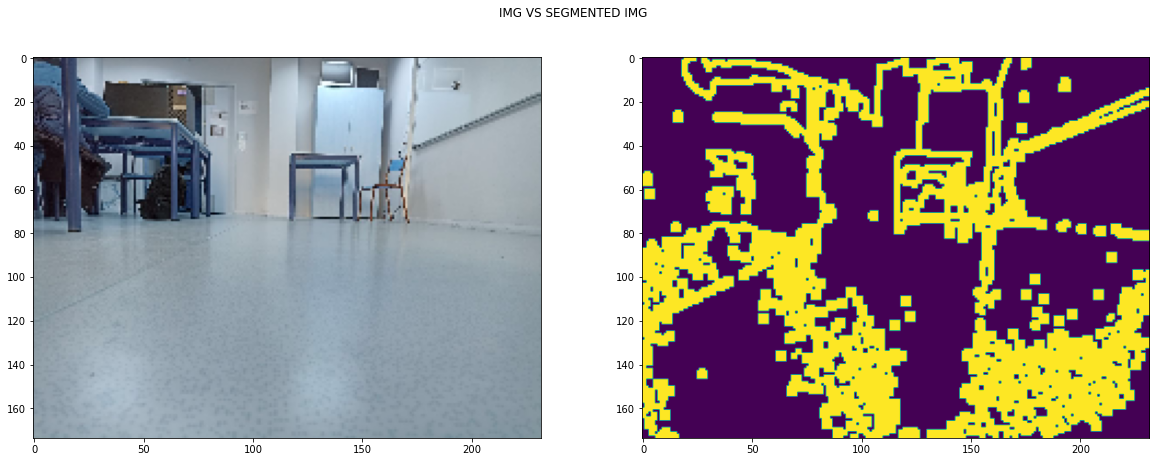

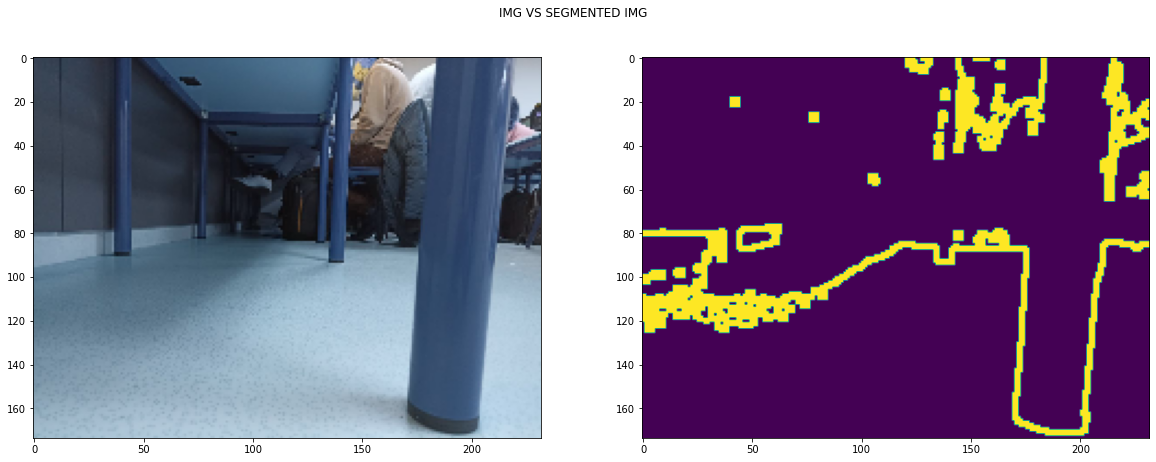

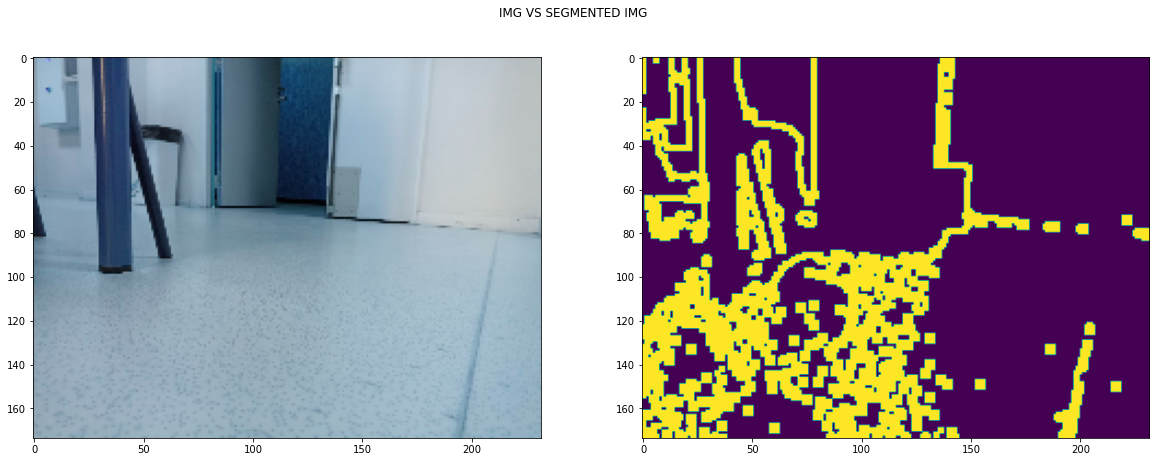

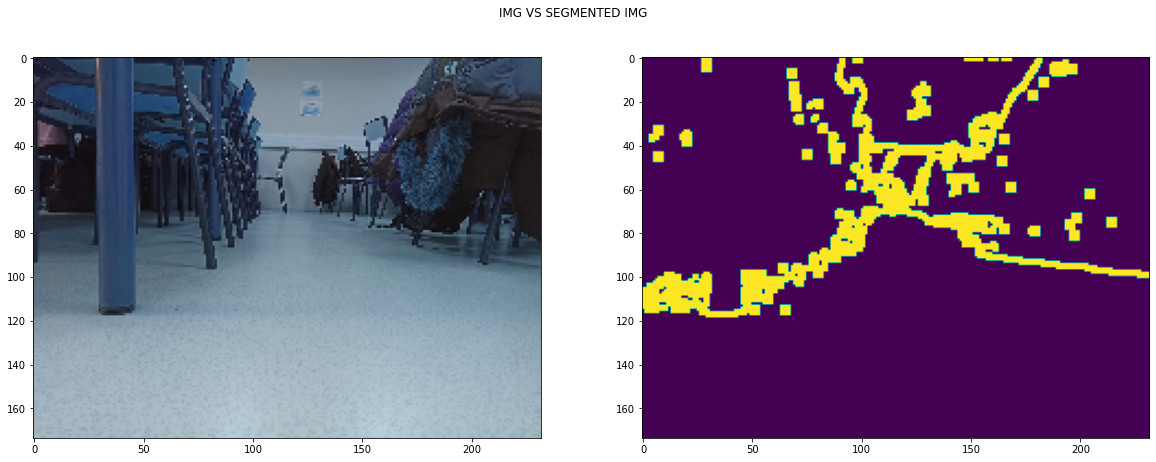

In [5]:
subsample = 5
imgs = get_imgs(path, subsample)
res_imgs = seg_edge(imgs)
show_imgs(imgs, res_imgs)

# OTSU SEGMENTATION

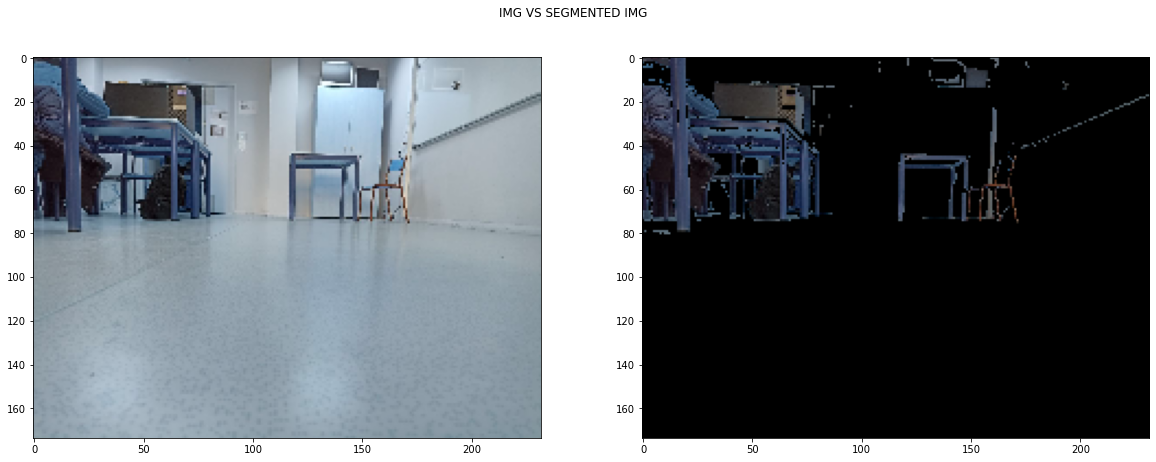

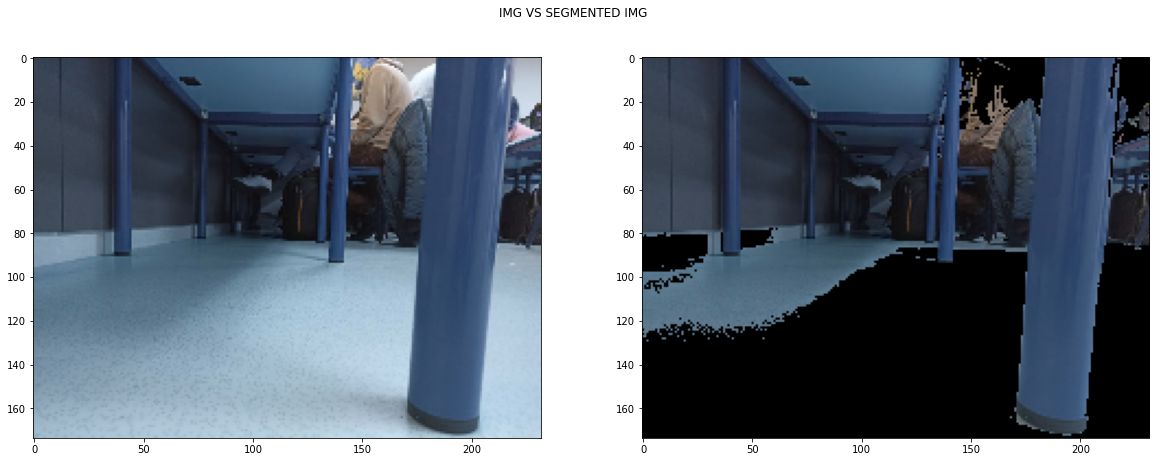

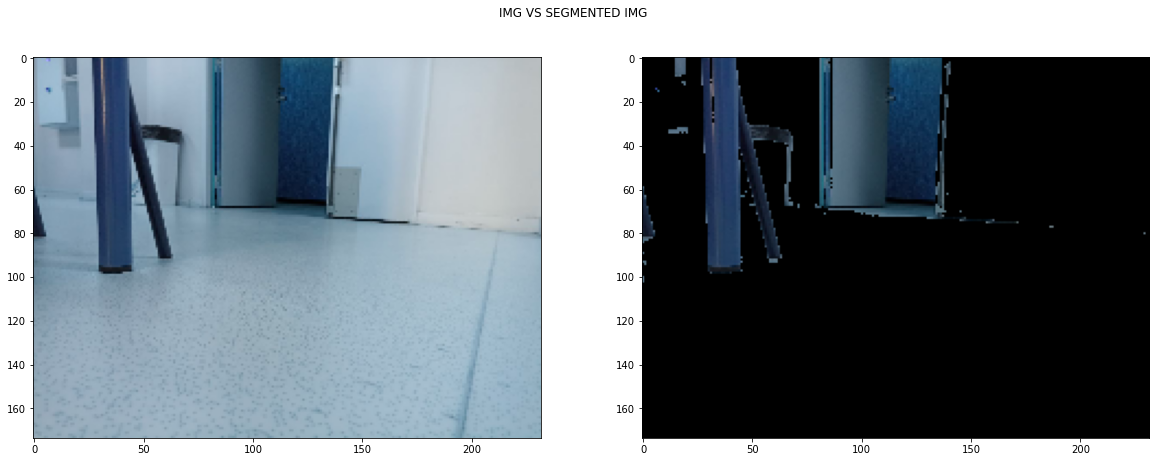

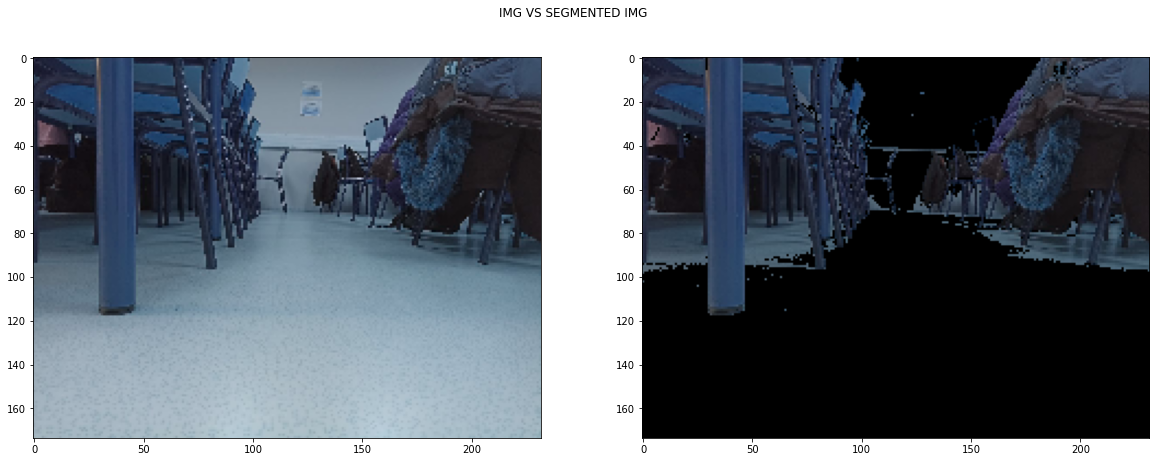

In [6]:
subsample = 5
imgs = get_imgs(path, subsample)
res_imgs = seg_otsu(imgs)
show_imgs(imgs, res_imgs)

# COLOR SEGMENTATION

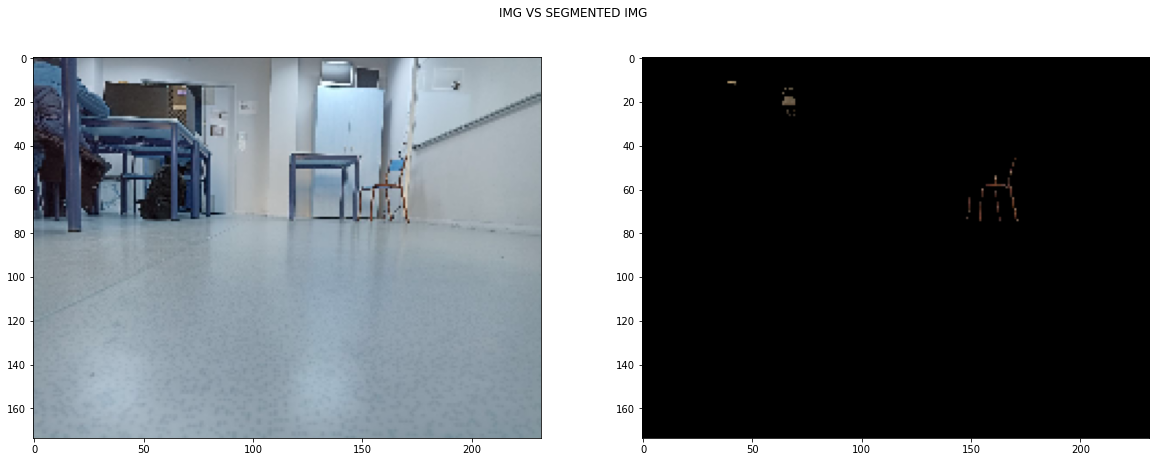

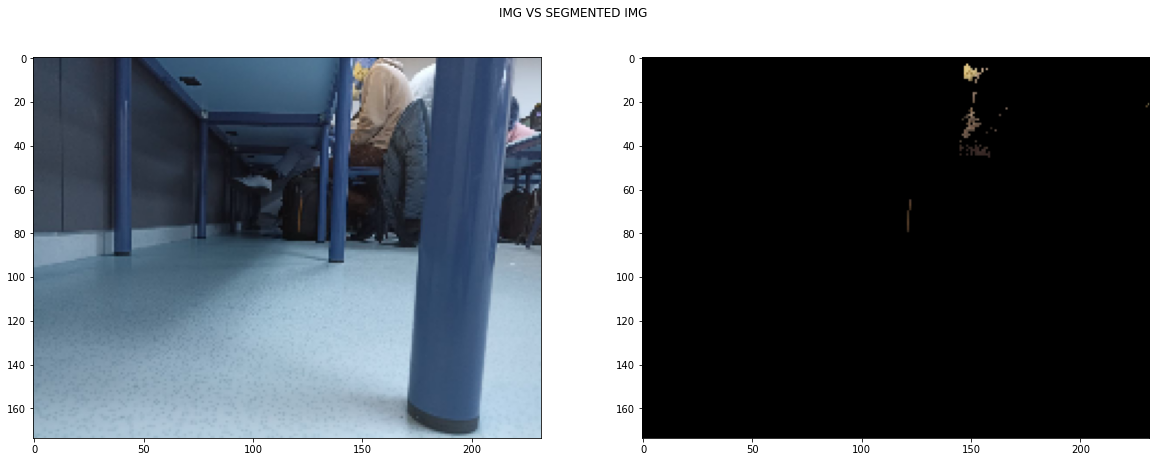

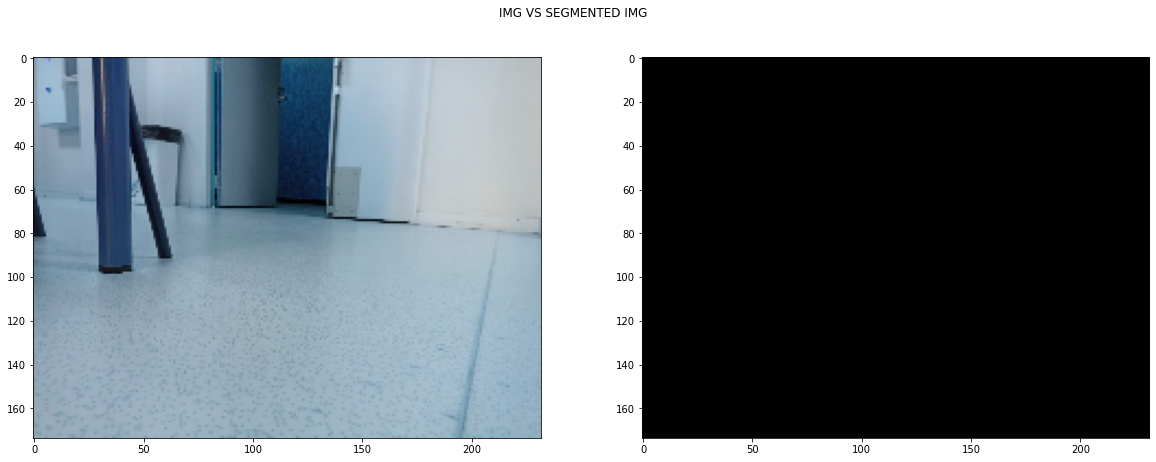

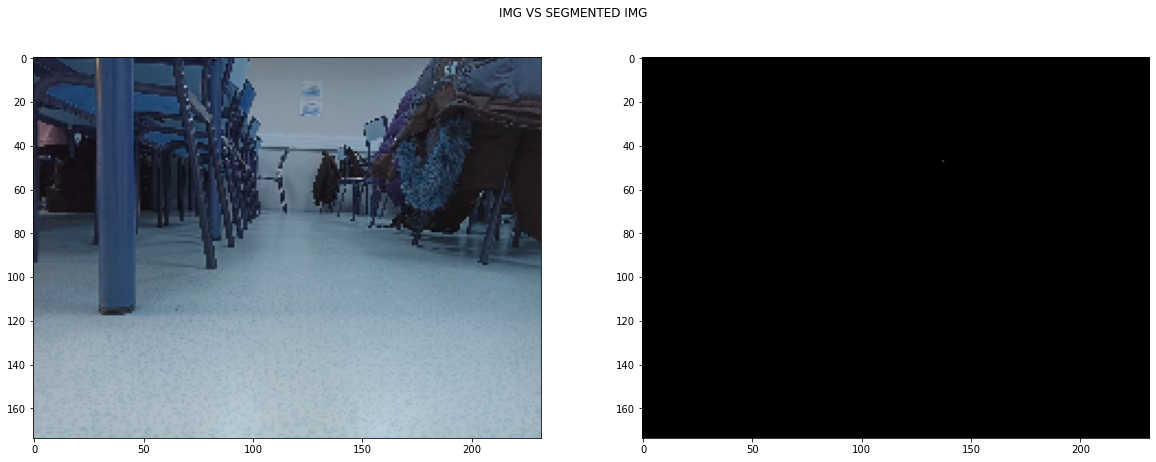

In [7]:
subsample = 5
color = "blue"
imgs = get_imgs(path, subsample)
res_imgs = seg_color(imgs, color)
show_imgs(imgs, res_imgs)